# Projet 2
#### Exercices

## import des bibliothèques

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re

***
## Pandas

In [2]:
df = pd.read_csv(r"csv_data\notes.csv")

In [3]:
df["note"][df["matiere"]=="Mathématiques"].mean()

11.333333333333334

In [4]:
notes_tot = df.groupby("nom")["note"].mean()
len(notes_tot[notes_tot<=10])

6

In [5]:
notes = df
notes.loc[((notes['matiere'] == 'Mathématiques') | (notes['matiere'] == 'Physique-Chimie')) & (notes['note'] >= 15), 'nom']

22         Guy Marois
23    Beaufort Lesage
28     Agramant Pepin
30    Theodore Clavet
31     Byron Lefebvre
32       Florus Devoe
Name: nom, dtype: object

***
## graphiques

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

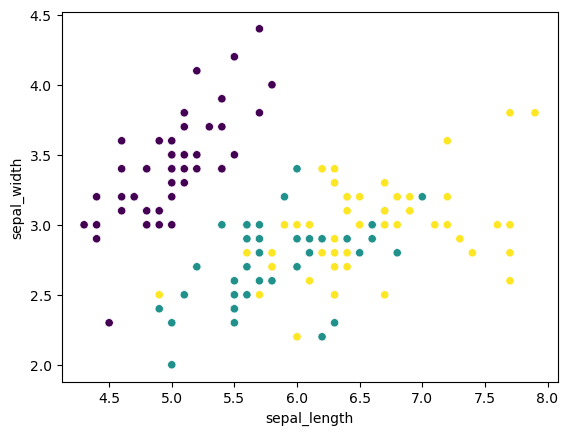

In [6]:
iris = pd.read_csv("csv_data\iris.csv")
varieties = list(iris['variety'].unique())

sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', c=iris['variety'].map(lambda x : varieties.index(x)))

***
## Netoyage des données

### types d'erreurs

chargement et affichage des données

In [7]:
data = pd.read_csv('csv_data\personnes.csv')
data.head()

,prenom,email,date_naissance,pays,taille
0,Leila,leila@example.com,23/01/1990,France,1.49m
1,Samuel,samuel_329@example.com,20/09/2001,NaN,1.67m
2,Radia,choupipoune@supermail.eu,12 sept. 1984,Côte d'ivoire,153cm
3,Marc,"marco23@example.com, mc23@supermail.eu",10/02/1978,France,1.65m
4,Heri,helloworld@supermail.eu,05/03/2008,Madagascar,1.34m


In [8]:
print(data.isnull().sum())

prenom            0
email             0
date_naissance    1
pays              1
taille            0
dtype: int64


In [9]:
data.loc[data['email'].duplicated(keep=False),:]

,prenom,email,date_naissance,pays,taille
1,Samuel,samuel_329@example.com,20/09/2001,NaN,1.67m
6,samuël,samuel_329@example.com,NaN,Bénin,1.45m


In [10]:
VALID_COUNTRIES = ['France', 'Côte d\'ivoire', 'Madagascar', 'Bénin', 'Allemagne'
                  , 'USA']
mask = ~data['pays'].isin(VALID_COUNTRIES)
data.loc[mask, 'pays'] = np.NaN

In [11]:
data['email'] = data['email'].str.split(',', n=1, expand=True)[0]

In [12]:
data['taille'] = data['taille'].str[:-1]
data['taille'] = pd.to_numeric(data['taille'], errors='coerce')

In [13]:
data.loc[data['taille'].isnull(), 'taille'] = data['taille'].mean()

In [14]:
data['date_naissance'] = pd.to_datetime(data['date_naissance'], format='%d/%m/%Y', errors='coerce')

In [15]:
data.head()

,prenom,email,date_naissance,pays,taille
0,Leila,leila@example.com,1990-01-23,France,1.490000
1,Samuel,samuel_329@example.com,2001-09-20,NaN,1.670000
2,Radia,choupipoune@supermail.eu,NaT,Côte d'ivoire,1.841667
3,Marc,marco23@example.com,1978-02-10,France,1.650000
4,Heri,helloworld@supermail.eu,2008-03-05,Madagascar,1.340000


### distribution empirique

In [16]:
data = pd.read_csv("csv_data\operations.csv", parse_dates=["date_operation"])

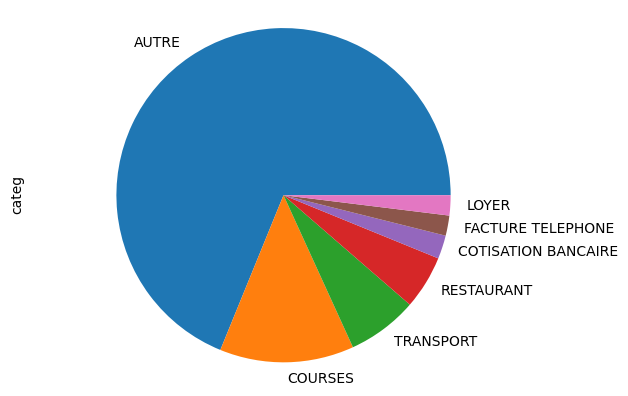

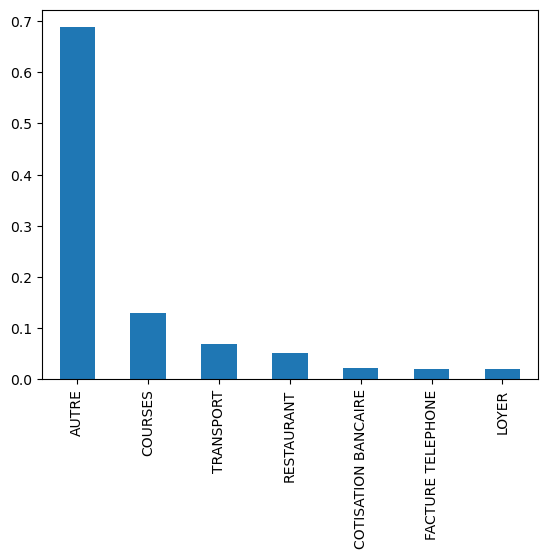

In [17]:
# Diagramme en secteurs
data["categ"].value_counts(normalize=True).plot(kind='pie')
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal') 
plt.show() # Affiche le graphique

# Diagramme en tuyaux d'orgues
data["categ"].value_counts(normalize=True).plot(kind='bar')
plt.show()

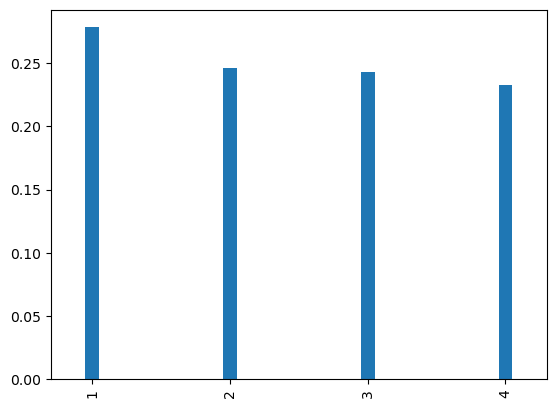

In [18]:
data['quart_mois'] = [int((jour-1)*4/31)+1 for jour in data["date_operation"].dt.day]
# Diagramme en bâtons
data["quart_mois"].value_counts(normalize=True).plot(kind='bar',width=0.1)
plt.show()

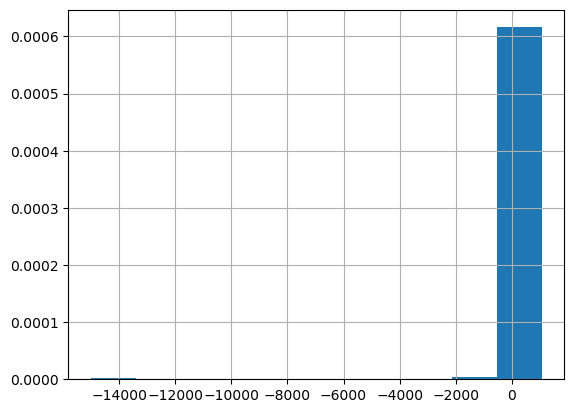

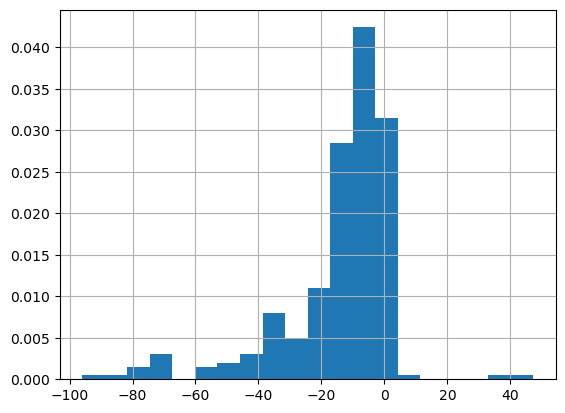

In [19]:
# Histogramme
data["montant"].hist(density=True)
plt.show()

# Histogramme plus beau
data[data.montant.abs() < 100]["montant"].hist(density=True,bins=20)
plt.show()

In [20]:
effectifs = data["quart_mois"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab = pd.DataFrame(modalites, columns = ["quart_mois"]) # création du tableau à partir des modalités
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(data) # len(data) renvoie la taille de l'échantillon

In [21]:
tab = tab.sort_values("quart_mois") # tri des valeurs de la variable X (croissant)
tab["F"] = tab["f"].cumsum() # cumsum calcule la somme cumulée

In [22]:
operations = [pd.Series.mean, pd.Series.median, pd.Series.mode]
op_names = ["moyenne", "mediane", "mode"]
stats = pd.DataFrame([data["montant"].groupby(data["categ"]).agg(op) for op in operations])
stats.index = pd.Series(op_names)
stats.head()

categ,AUTRE,COTISATION BANCAIRE,COURSES,FACTURE TELEPHONE,LOYER,RESTAURANT,TRANSPORT
moyenne,-47.420711,-1.885714,-16.497436,-7.973333,-345.0,-10.3325,-52.997143
mediane,-8.140000,-1.920000,-12.240000,-7.02,-345.0,-10.1000,-53.100000
mode,-1.600000,-1.920000,-32.670000,"[-7.02, -6.38]",-345.0,-9.2000,-73.000000


In [23]:
data = pd.read_csv("csv_data\operations.csv", parse_dates=["date_operation"])
data.columns

Index(['date_operation', 'libelle', 'montant', 'solde_avt_ope', 'categ'], dtype='object')

In [24]:
def filter(x):
    for i in range(0, 5000, 500):
        if x<i :
            return i
    return 5000

data['money_cat'] = data['solde_avt_ope'].apply(filter)
data['normalised_solde'] = abs(data['solde_avt_ope']-data['money_cat'])/500
cat, counts = np.unique(data['money_cat'], return_counts=True)

[Text(1, 0, 'n=2\n1500'),
 Text(2, 0, 'n=6\n2000'),
 Text(3, 0, 'n=33\n2500'),
 Text(4, 0, 'n=34\n3000'),
 Text(5, 0, 'n=89\n3500'),
 Text(6, 0, 'n=79\n4000'),
 Text(7, 0, 'n=53\n4500'),
 Text(8, 0, 'n=13\n5000')]

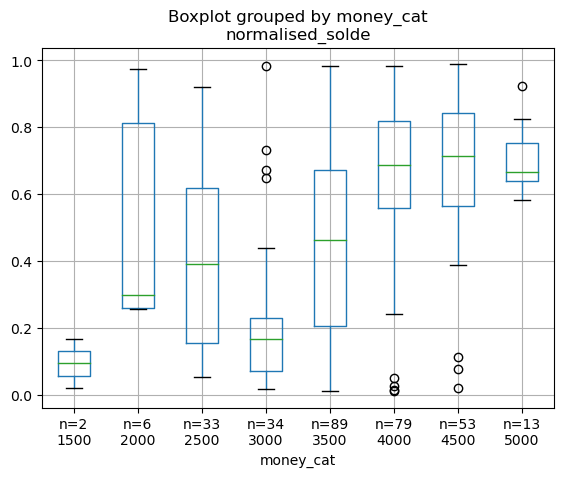

In [25]:
fig, ax = plt.subplots()
data.boxplot('normalised_solde', by='money_cat', ax=ax)
ax.set_xticklabels([f'n={n}\n{c}' for c,n in zip(cat,counts)])

In [26]:
import datetime as dt

# Selection du sous-échantillon
courses = data[data.categ == "COURSES"]

# On trie les opérations par date
courses = courses.sort_values("date_operation")

# On ramène les montants en positif
courses["montant"] = -courses["montant"]

# calcul de la variable attente
r = []
last_date = dt.datetime.now()
for i,row in courses.iterrows():
    days = (row["date_operation"]-last_date).days
    if days == 0:
        r.append(r[-1])
    else:
        r.append(days)
    last_date = row["date_operation"]
courses["attente"] = r
courses = courses.iloc[1:,]

# on regroupe les opérations qui ont été effectués à la même date
# (courses réalisées le même jour mais dans 2 magasins différents)
a = courses.groupby("date_operation")["montant"].sum()
b = courses.groupby("date_operation")["attente"].first()
courses = pd.DataFrame({"montant":a, "attente":b})

***
## qcm

In [32]:
import scipy.stats as st

In [55]:
data = pd.read_csv("csv_data/course+-+Quiz+P4.csv")
data.head()
data.describe()

,Position,Dept,Temps_secondes,Age
count,340.000000,340.000000,3.400000e+02,340.000000
mean,170.500000,56.991176,1.644553e+06,41.950000
std,98.293777,25.059279,5.145263e+02,12.092094
min,1.000000,14.000000,1.643543e+06,18.000000
25%,85.750000,27.000000,1.644200e+06,34.000000
50%,170.500000,76.000000,1.644536e+06,42.000000
75%,255.250000,76.000000,1.644906e+06,50.000000
max,340.000000,78.000000,1.645831e+06,74.000000


In [45]:
data["age_cat"] = data["Age"].map(lambda x:(x//10)*10)

In [46]:
st.pearsonr(data["age_cat"], data["Position"])[0]

0.1150473744298523

In [52]:
import statsmodels.api as sm
Y = data["Position"]
X = data[["Age"]]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['Age'],result.params['intercept']
print(result.params)

Age            0.862177
intercept    134.331691
dtype: float64


In [58]:
X = "Sexe" # qualitative
Y = "Temps_secondes" # quantitative

sous_echantillon = data

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(sous_echantillon[X],sous_echantillon[Y])

0.20400517398334017